#  `Matplotlib` 作业

## 1. 绘制如下动画

![](my_fancy_animation.gif)

MovieWriter ffmpeg unavailable; using Pillow instead.


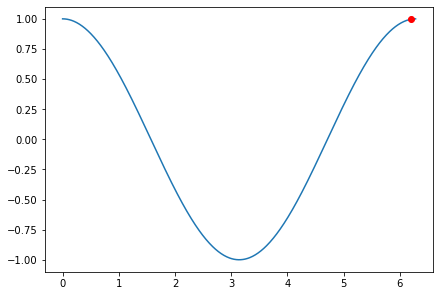

In [3]:
import numpy as np
import matplotlib.animation as animation 
import matplotlib.pyplot as plt
 
fig, ax = plt.subplots(constrained_layout=True) 

x = np.arange(0, 2*np.pi, 0.01) 
y = np.cos(x) 
line, = ax.plot(x, y) 
dot, = ax.plot(x[0],y[0],marker='o',color='r') 

def init():  # only required for blitting to give a clean slate. 
    dot.set_data(np.nan,np.nan) 
    return dot, 
 
def animate(i): 
    dot.set_data(x[i],y[i])
    return dot, 

ani = animation.FuncAnimation(
    fig, animate, init_func=init, frames=range(0,len(x),10),interval=50, blit=True) 

ani.save("my_fancy_animation.gif", dpi=80)    

## 2. 绘制如下图形
![](layout.png)

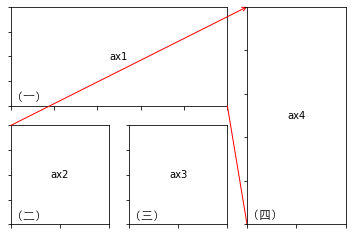

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.patches import ConnectionPatch

# 请使用你的电脑上的字体文件
myfont = mpl.font_manager.FontProperties(fname='/System/Library/Fonts/STHeiti Light.ttc')

def format_axes(fig):
    for i, ax in enumerate(fig.axes):
        ax.text(0.5, 0.5, "ax%d" % (i+1), va="center", ha="center")
        ax.tick_params(labelbottom=False, labelleft=False)
        
fig = plt.figure()#(constrained_layout=True)
gs = fig.add_gridspec(2, 3)

f_ax1 = fig.add_subplot(gs[0, :-1])
f_ax1.text(0,0.05,'（一）',transform=f_ax1.transAxes, fontproperties=myfont, fontsize=12)
f_ax2 = fig.add_subplot(gs[1, 0])
f_ax2.text(0,0.05,'（二）',transform=f_ax2.transAxes, fontproperties=myfont, fontsize=12)
f_ax3 = fig.add_subplot(gs[1, 1])
f_ax3.text(0,0.05,'（三）',transform=f_ax3.transAxes, fontproperties=myfont, fontsize=12)
f_ax4 = fig.add_subplot(gs[:, 2])
f_ax4.text(0,0.025,'（四）',transform=f_ax4.transAxes, fontproperties=myfont, fontsize=12)
format_axes(fig)

con1 = ConnectionPatch(xyA=(0,1), xyB=(0,1),coordsA="axes fraction", coordsB="axes fraction",
                      arrowstyle='->', axesA=f_ax2, axesB=f_ax4, color='red')
con2 = ConnectionPatch(xyA=(1,0), xyB=(0,0),coordsA="axes fraction", coordsB="axes fraction",
                      axesA=f_ax1, axesB=f_ax4, color='red')

f_ax3.add_artist(con1)
f_ax3.add_artist(con2)

plt.savefig('layout.png',dpi=100,bbox_inches='tight')